In [1]:
from Classes import PredictClusters

2024-11-14 14:31:43.301347: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-14 14:31:43.304186: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-14 14:31:43.335838: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-14 14:31:43.335861: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-14 14:31:43.336949: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [2]:
data_path = "/home/elizahoward/cmspix28-mc-sim/MuC_Output/"
model = PredictClusters(tfrecords_dir_train="/home/elizahoward/smart-pixels-ml/ouput_prediction/tfrecords_train_c59fb8dd", tfrecords_dir_validation="/home/elizahoward/smart-pixels-ml/ouput_prediction/tfrecords_validation_c59fb8dd")
#data_directory_path = data_path, muon_collider=True)
model.loadWeights("smart-pixels-ml/ouput_prediction/weights/weights.06-t-83.27-v-103.09.hdf5")

Directory /home/elizahoward/smart-pixels-ml/ouput_prediction/tfrecords_train_c59fb8dd is removed...


2024-11-14 14:32:00.961644: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Saving batches as TFRecords: 100%|██████████| 618/618 [00:00<00:00, 1854.35it/s]


--- Training generator 15.620973825454712 seconds ---
Directory /home/elizahoward/smart-pixels-ml/ouput_prediction/tfrecords_validation_c59fb8dd is removed...


Saving batches as TFRecords: 100%|██████████| 147/147 [00:00<00:00, 1965.18it/s]


--- Validation generator 3.352381944656372 seconds ---
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 13, 21, 1)]       0         
                                                                 
 q_separable_conv2d (QSepar  (None, 11, 19, 5)         19        
 ableConv2D)                                                     
                                                                 
 q_activation (QActivation)  (None, 11, 19, 5)         0         
                                                                 
 q_conv2d (QConv2D)          (None, 11, 19, 5)         30        
                                                                 
 q_activation_1 (QActivatio  (None, 11, 19, 5)         0         
 n)                                                              
                                                                 
 avera

In [1]:
#model.compileModel(learning_rate=0.0001)
model.runTraining(epochs=10)

NameError: name 'model' is not defined

In [6]:
model.checkResiduals()

  1/147 [..............................] - ETA: 10s

147/147 [==============================] - 5s 34ms/step


100%|██████████| 147/147 [00:04<00:00, 31.85it/s]

Mean and standard deviation of residuals for x-midplane: (8.934515030710568,7.338359477052811)
Mean and standard deviation of residuals for y-midplane: (3.192994868979621,3.3285810605635766)
Mean and standard deviation of residuals for cotAlpha: (0.5891421296328796,0.6507809473069669)
Mean and standard deviation of residuals for cotBeta: (0.3139185334594901,0.8746551657829735)


In [3]:
from tqdm import tqdm
import numpy as np
complete_truth = None
for _, y in tqdm(model.training_generator):
    if complete_truth is None:
        complete_truth = y
    else:
        complete_truth = np.concatenate((complete_truth, y), axis=0)
        
print(len(complete_truth))

from tqdm import tqdm
import numpy as np
complete_truth = None
for _, y in tqdm(model.validation_generator):
    if complete_truth is None:
        complete_truth = y
    else:
        complete_truth = np.concatenate((complete_truth, y), axis=0)
        
print(len(complete_truth))

100%|██████████| 618/618 [00:19<00:00, 31.38it/s]


61765


100%|██████████| 147/147 [00:04<00:00, 32.03it/s]

14650


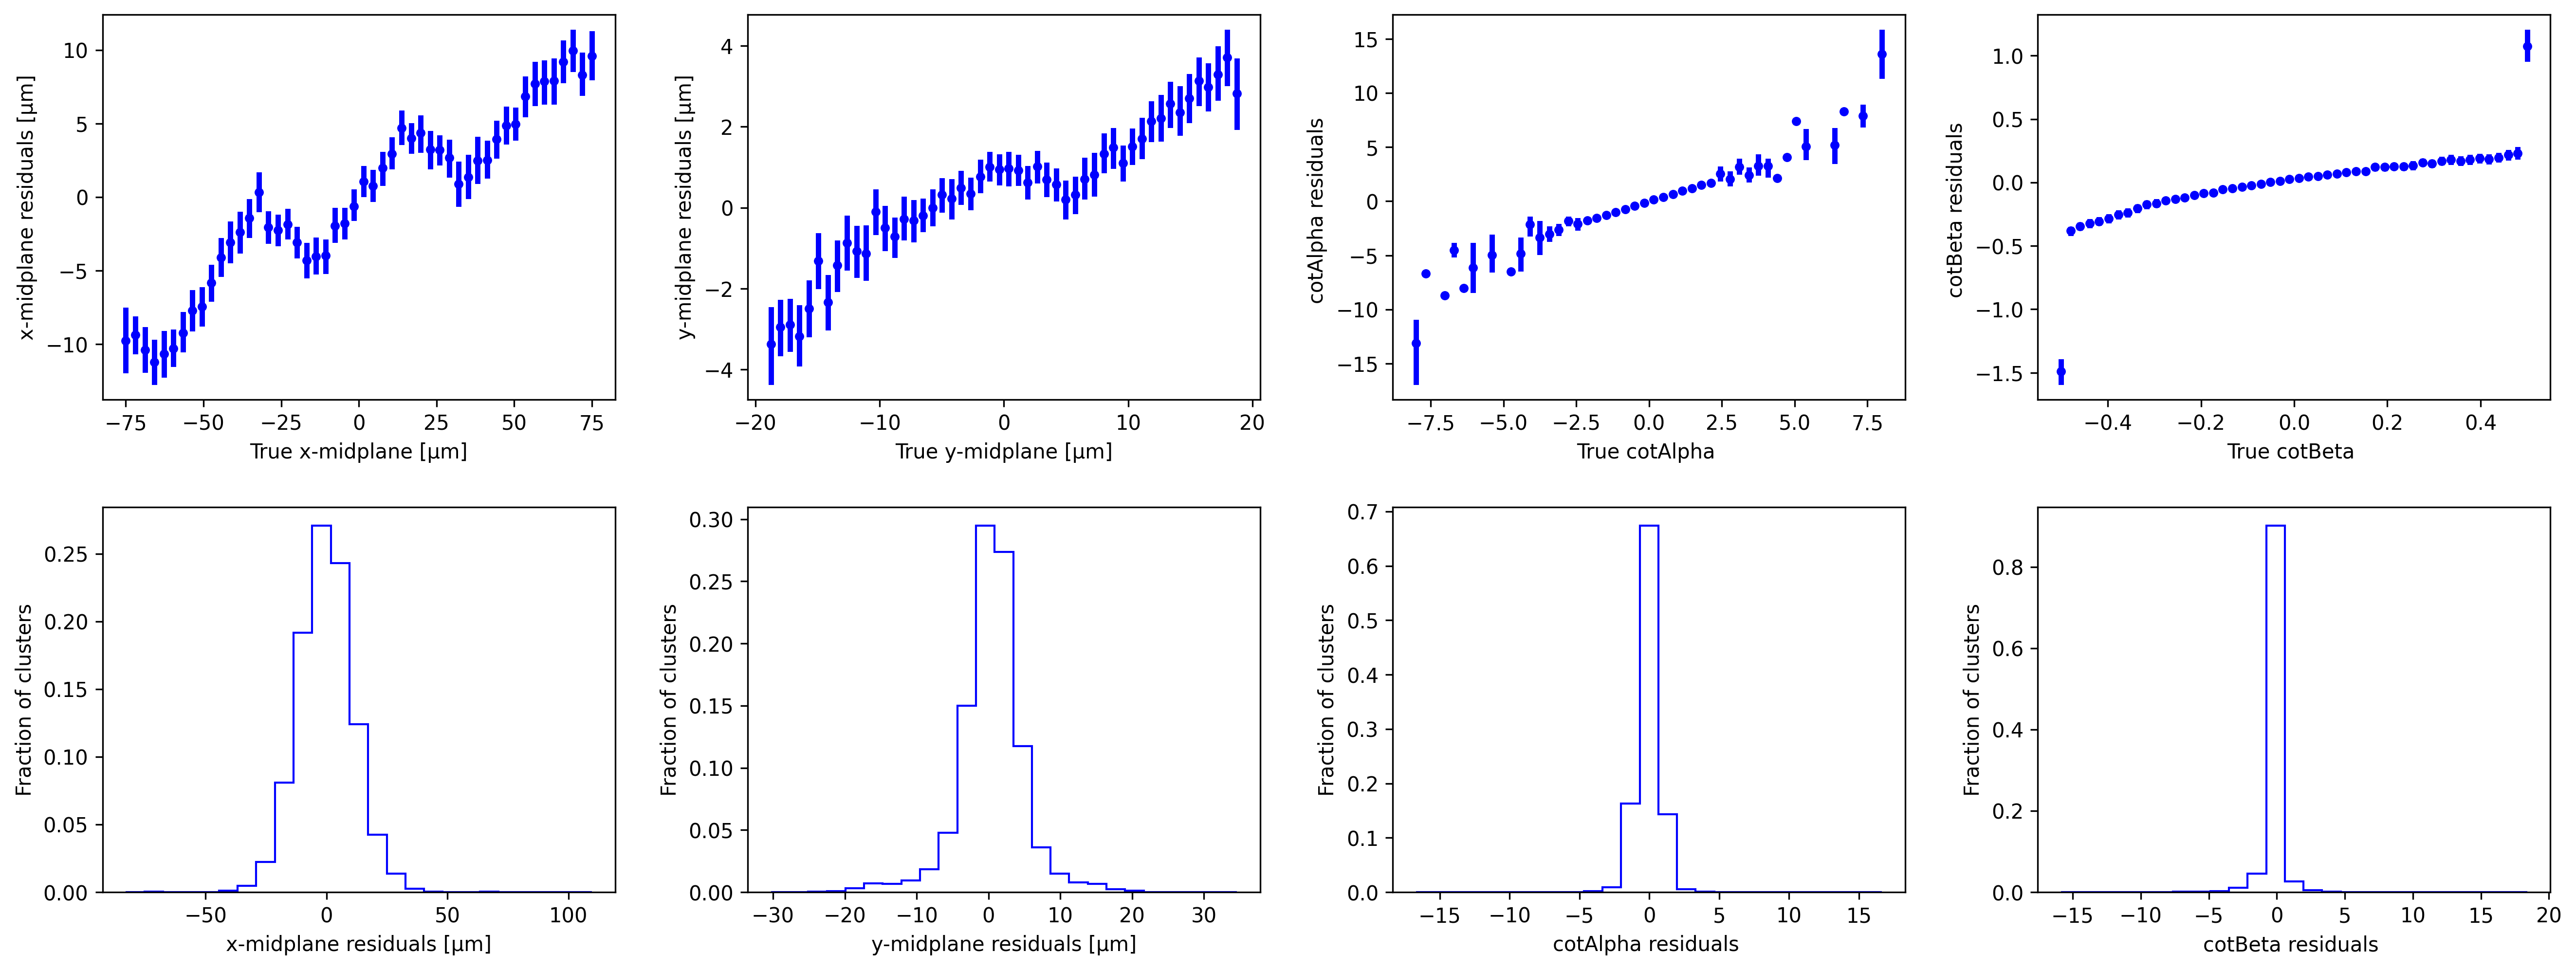

In [7]:
model.plotResiduals()